In [76]:
import numpy as np
import matplotlib.pyplot as plt


In [86]:
Tmax = 100
Lambda = 0.5
n = np.random.poisson(Lambda*Tmax)
print(n)

59


 # Processus de Poisson homogène

In [87]:
T = np.sort(np.random.uniform(0,Tmax,n))

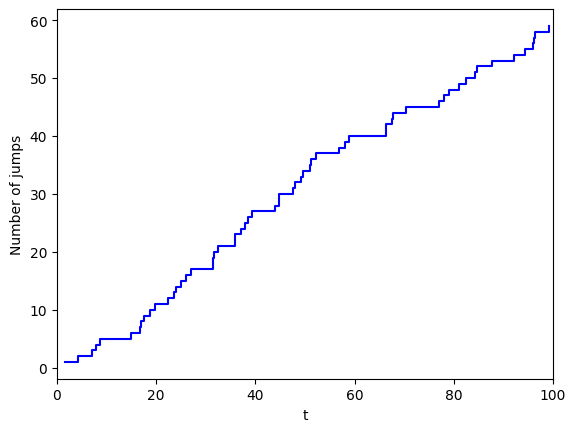

In [88]:
plt.step(T, np.arange(1, len(T) + 1), where='post', color='blue')
plt.xlim(0,Tmax)
plt.xlabel('t')
plt.ylabel('Number of jumps')
plt.savefig('Poisson_hom.png')

# Processus de Poisson non homogène

On va modéliser ça avec une méthode d'acceptation/rejet. On fixe déjà l'intensité : 

In [89]:
def Lambda_nh(t):
    return(1.5+np.cos(0.1*t))
Lambda_bar = 2.5

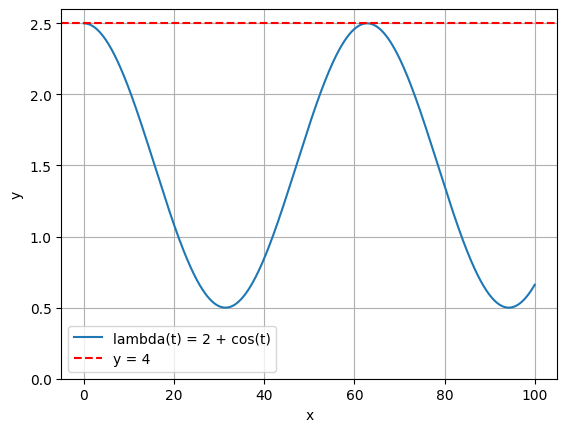

In [90]:
plt.plot(np.linspace(0,100, 1000), Lambda_nh(np.linspace(0,100, 1000)), label='lambda(t) = 2 + cos(t)')
plt.axhline(y=Lambda_bar, color='r', linestyle='--', label='y = 4')
plt.ylim(0)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [91]:
Tmax = 100
n = np.random.poisson(Lambda_bar*Tmax)
print(n)

237


### Acceptation rejet

In [101]:
T = [0]
t = 0
i = 1
x = [0]
y = [0]
while(t < Tmax):
    t = x[i-1] + np.random.exponential(1/Lambda_bar)
    u = np.random.uniform(0,1)
    x.append(t)
    y.append(u)
    if(t >= Tmax):
        break
    if(u <= Lambda_nh(t)/Lambda_bar ):
        T.append(t)
    i = i + 1
        

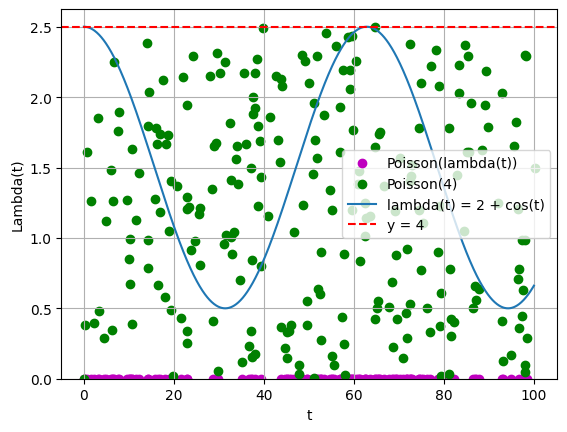

In [102]:
plt.scatter(T, [0]*len(T), color='m', label = 'Poisson(lambda(t))')
plt.scatter(x,np.array(y)*Lambda_bar, color='g', label = 'Poisson(4)')
plt.plot(np.linspace(0,Tmax, 1000), Lambda_nh(np.linspace(0,Tmax, 1000)), label='lambda(t) = 2 + cos(t)')
plt.axhline(y=Lambda_bar, color='r', linestyle='--', label='y = 4')
plt.ylim(0)

plt.xlabel('t')
plt.ylabel('Lambda(t)')
plt.legend()

# Show plot
plt.grid(True)
plt.savefig("Reject_sampl.png")

### Résulat final

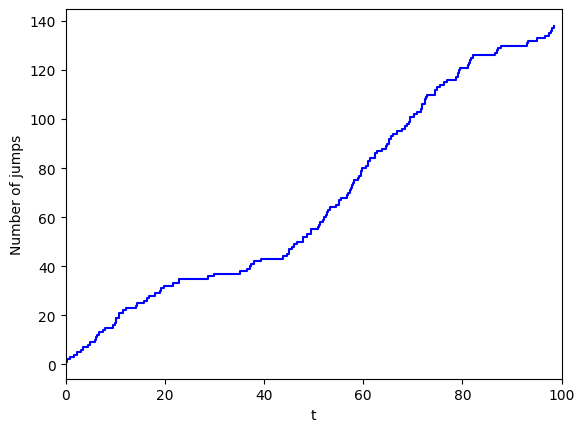

In [104]:
plt.step(T, np.arange(1, len(T) + 1), where='post', color='blue')
plt.xlim(0,Tmax)
plt.xlabel('t')
plt.ylabel('Number of jumps')
plt.savefig('Poisson_inhom.png')